In [12]:
from PIL import Image, ImageDraw
import sys, os
from osgeo import gdal_array
import numpy as np
import matplotlib.pyplot as plt
import geoio
import math
#from osgeo 

import gdal, gdalnumeric, ogr, osr
import pyproj

In [4]:
#ACCEDO A LAS IMÁGENES SATELITALES correspondientes

b1 = r"E:\Imágenes Satelitales\2017\226_86\1\LC08_L1TP_226086_20170116_20170311_01_T1_sr_band1.tif"
b2 = r"E:\Imágenes Satelitales\2017\226_86\1\LC08_L1TP_226086_20170116_20170311_01_T1_sr_band2.tif"
b3 = r"E:\Imágenes Satelitales\2017\226_86\1\LC08_L1TP_226086_20170116_20170311_01_T1_sr_band3.tif"
b4 = r"E:\Imágenes Satelitales\2017\226_86\1\LC08_L1TP_226086_20170116_20170311_01_T1_sr_band4.tif"
b5 = r"E:\Imágenes Satelitales\2017\226_86\1\LC08_L1TP_226086_20170116_20170311_01_T1_sr_band5.tif"
b6 = r"E:\Imágenes Satelitales\2017\226_86\1\LC08_L1TP_226086_20170116_20170311_01_T1_sr_band6.tif"
b7 = r"E:\Imágenes Satelitales\2017\226_86\1\LC08_L1TP_226086_20170116_20170311_01_T1_sr_band7.tif"

band1 = gdal.Open(b1, gdal.GA_ReadOnly)
band2 = gdal.Open(b2, gdal.GA_ReadOnly)
band3 = gdal.Open(b3, gdal.GA_ReadOnly)
band4 = gdal.Open(b4, gdal.GA_ReadOnly)
band5 = gdal.Open(b5, gdal.GA_ReadOnly)
band6 = gdal.Open(b6, gdal.GA_ReadOnly)
band7 = gdal.Open(b7, gdal.GA_ReadOnly)

In [5]:
#JUNTO A LAS BANDAS 4,3 Y 2 QUE SEGÚN wikipedia SON LAS BANDAS ROJA, VERDE Y AZUL RESPECTIVAMENTE
#De esa manera, formo una imágen visualizable RGB
#Esta servirá más adelante como verificación en la generación de un Dataset

red_array = band4.ReadAsArray().astype(np.float32)
green_array = band3.ReadAsArray().astype(np.float32)
blue_array = band2.ReadAsArray().astype(np.float32)

imagen = (np.zeros(red_array.size*3, dtype = np.float32)).reshape(red_array.shape[0],red_array.shape[1],3)

imagen[:,:,0] = red_array
imagen[:,:,1] = blue_array
imagen[:,:,2] = green_array

In [19]:
#Esto esta copypasteado del stackoverflow de acá: https://gis.stackexchange.com/questions/331927/cutting-a-portion-of-a-satellite-image-based-on-coordinates-in-gdal
#Solo hay que escalarlo, dentro de un ciclo for por ejemplo, y listo, se habran convertido todas las coordenadas del excel
#a puntos de pixeles con los cuales extraer los datos necesarios de la imagen

#FALTA COMENTAR

gt = band1.GetGeoTransform()  # Geotransforms allow conversion of pixel to map coordinates
crs = band1.GetProjection()
lon, lat = -61, -37
source = osr.SpatialReference()
source.ImportFromEPSG(4326)  # WGS84 4326
target = osr.SpatialReference()
target.ImportFromWkt(crs)
transform = osr.CoordinateTransformation(source, target)

mx, my, z = transform.TransformPoint(lon, lat)

# Inverse GT to convert from map to pixel
inv_gt = gdal.InvGeoTransform(gt)  

# Apply the inverse GT and truncate the decimal places.
px, py = (math.floor(f) for f in gdal.ApplyGeoTransform(inv_gt, mx, my))

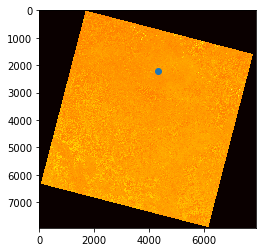

In [18]:
#GRAFICO SOLO EL CANAL ROJO, es para verificacion
#Nuevamente guardo la imagen como png para verla mejor

plt.imshow(red_array, cmap = 'hot')
plt.plot(px,py,'o')
plt.savefig('red_band.png', dpi=500)
#plt.hist(red_array.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')